In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

in standardizing, we will subtract the mean of each variable from their individual values and divide by the variance

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
x_train.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
             metrics = ['mae'])

In [21]:
model_history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3602 - mae: 0.4260 - val_loss: 0.3476 - val_mae: 0.4143
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3590 - mae: 0.4250 - val_loss: 0.3744 - val_mae: 0.4199
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3581 - mae: 0.4250 - val_loss: 0.3512 - val_mae: 0.4128
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3572 - mae: 0.4239 - val_loss: 0.3422 - val_mae: 0.4140
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3562 - mae: 0.4233 - val_loss: 0.3449 - val_mae: 0.4133
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3554 - mae: 0.4231 - val_loss: 0.3488 - val_mae: 0.4111
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3546 - mae: 0.4220 - val_loss: 0.3414 - val_mae: 0.4113
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [22]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3449 - mae: 0.4167


In [18]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426402568817,
  0.38980168104171753,
  0.3872992694377899,
  0.38511765003204346,
  0.38287150859832764,
  0.3807542622089386,
  0.3787875175476074,
  0.37684163451194763,
  0.3748517632484436,
  0.37324920296669006,
  0.3715410530567169,
  0.3699612319469452,
  0.368447870016098,
  0.3671063780784607,
  0.36586254835128784,
  0.36476606130599976,
  0.36347639560699463,
  0.36216965317726135,
  0.36128607392311096],
 'mae': [0.448872447013855,
  0.44692230224609375,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.44146016240119934,
  0.4398253858089447,
  0.4384708106517792,
  0.4375317096710205,
  0.43594637513160706,
  0.4347257614135742,
  0.4335672855377197,
  0.432650089263916,
  0.4315134584903717,
  0.4306658208370209,
  0.4304641783237457,
  0.4293918311595917,
  0.42838096618652344,
  0.42722728848457336,
  0.42688849568367004],
 'val_loss': [0.3695237338542938,
  0.36980190873146057,
  0.3646637499332428,
  0.3632129

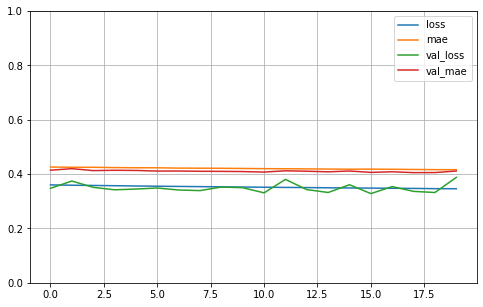

In [23]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [24]:
x_new = x_test[:3]

In [25]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 244ms/step
[[0.6382742]
 [1.7790614]
 [4.0306826]]
[0.477   0.458   5.00001]


##### To delete the model and to clear keras session

In [26]:
del model

In [27]:
keras.backend.clear_session

<function keras.backend.clear_session()>

In [28]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [31]:
model.compile(loss = 'mean_squared_error',
             optimizer = keras.optimizers.SGD(learning_rate = 1e-3),
             metrics = ['mae'])

In [32]:
model_history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [39]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4007 - mae: 0.4556


[0.4007267951965332, 0.4556109309196472]

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

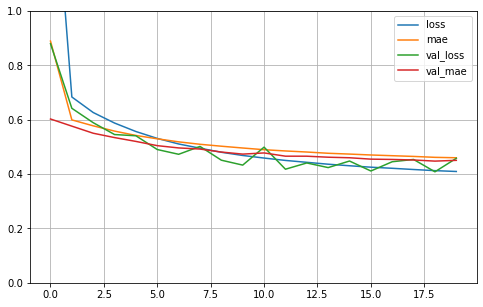

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

### Saving and Restoring the model

In [40]:
model.save("y_func_model.h5")

In [41]:
del model

In [44]:
keras.backend.clear_session()

In [46]:
model = keras.models.load_model("y_func_model.h5")

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [48]:
y_pred = model.predict(x_new)
print(y_pred)

1/1 [==============================] - 0s 452ms/step
[[0.699683 ]
 [1.662205 ]
 [3.4106717]]
